In [1]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#----------------------------------------------------

In [2]:
#load iris data

IrisData = load_iris()

#X Data
X = IrisData.data
print('X Data is \n' , X[:10])
print('X shape is ' , X.shape)
print('X Features are \n' , IrisData.feature_names)

#y Data
y = IrisData.target
print('y Data is \n' , y[:10])
print('y shape is ' , y.shape)
print('y Columns are \n' , IrisData.target_names)

#----------------------------------------------------

X Data is 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
X shape is  (150, 4)
X Features are 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y Data is 
 [0 0 0 0 0 0 0 0 0 0]
y shape is  (150,)
y Columns are 
 ['setosa' 'versicolor' 'virginica']


In [3]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

#----------------------------------------------------

X_train shape is  (100, 4)
X_test shape is  (50, 4)
y_train shape is  (100,)
y_test shape is  (50,)


In [4]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.97
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [100]
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [5]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

#----------------------------------------------------

Predicted Value for LogisticRegressionModel is :  [2 0 1 1 2 0 2 2 2 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[1.77247443e-04 5.74600550e-02 9.42362698e-01]
 [9.40385964e-01 5.96105090e-02 3.52740197e-06]
 [9.42566661e-02 8.83894359e-01 2.18489752e-02]
 [3.81561293e-02 8.66806912e-01 9.50369584e-02]
 [9.21360910e-05 6.01076413e-02 9.39800223e-01]
 [9.52948909e-01 4.70475932e-02 3.49741970e-06]
 [1.25591893e-06 1.10552085e-02 9.88943536e-01]
 [7.04559729e-05 1.08813484e-01 8.91116060e-01]
 [1.64593091e-04 1.05823796e-01 8.94011611e-01]
 [1.06830862e-02 7.60838252e-01 2.28478661e-01]]


Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  0 17]]


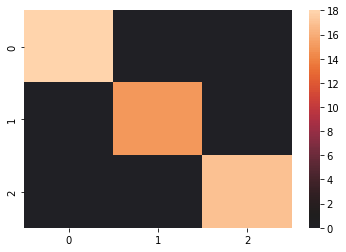

In [6]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()


print('====================================================')

#--------------------------------------------------

In [7]:
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')


SVCModel Train Score is :  0.96
SVCModel Test Score is :  0.98
----------------------------------------------------


Predicted Value for SVCModel is :  [2 0 1 1 2 0 2 2 2 1]
Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  1 16]]


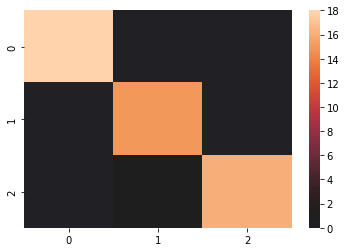

In [8]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()